## Problem statement:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Importing Skin Cancer Data

## Importing all the important libraries

In [44]:
# https://stackoverflow.com/questions/71000120/colab-0-unimplemented-dnn-library-is-not-found
# # Check libcudnn8 version
# !apt-cache policy libcudnn8

# # Install latest version
# !apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# # Export env variables
# !export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
# !export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
# !export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
# !export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# # Install tensorflow
# !pip install tflite-model-maker==0.4.0
# !pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
# !pip install pycocotools==2.0.4
# !pip install opencv-python-headless==4.6.0.66

libcudnn8:
  Installed: 8.0.5.39-1+cuda11.1
  Candidate: 8.5.0.96-1+cuda11.7
  Version table:
     8.5.0.96-1+cuda11.7 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda10.2

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Successfully uninstalled tensorflow-2.9.1
     |████████████████████████████████| 511.7 MB 5.8 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Some analysis about no. classes

In [5]:
data_detail_pd = pd.DataFrame(columns=["Dir_Name","Total Image(Train)","Total Percentage(Train)","Total Image(Test)","Total Percentage(Test)"])
# train data in each folders
for dir_name in glob.glob(os.path.join(data_dir_train, "*")):
  total_image_in_folder = len(glob.glob(os.path.join(dir_name, "*.jpg")))
  df = {"Dir_Name":os.path.basename(dir_name),"Total Image(Train)":total_image_in_folder,"Total Percentage(Train)":round((total_image_in_folder/image_count_train)*100,2)}
  data_detail_pd = data_detail_pd.append(df,ignore_index=True)
data_detail_pd = data_detail_pd.set_index("Dir_Name")
# test data in each folders
for dir_name in glob.glob(os.path.join(data_dir_test, "*")):
  total_image_in_folder = len(glob.glob(os.path.join(dir_name, "*.jpg")))
  data_detail_pd.loc[os.path.basename(dir_name),"Total Image(Test)"]  = total_image_in_folder
  data_detail_pd.loc[os.path.basename(dir_name),"Total Percentage(Test)"]  = round((total_image_in_folder/image_count_test)*100,2)
# data_detail_pd = data_detail_pd.set_index("Dir_Name")
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
pigmented benign keratosis,462,20.63,16.0,13.56
melanoma,438,19.56,16.0,13.56
basal cell carcinoma,376,16.79,16.0,13.56
nevus,357,15.94,16.0,13.56
squamous cell carcinoma,181,8.08,16.0,13.56
vascular lesion,139,6.21,3.0,2.54
actinic keratosis,114,5.09,16.0,13.56
dermatofibroma,95,4.24,16.0,13.56
seborrheic keratosis,77,3.44,3.0,2.54


Observation : Melanoma has 19.56% of data in train and 13.56% data in test data set.

---



Highest Sample of Data : pigmented benign keratosis (20.63%)

---


Lowest Sample of Data  : seborrheic keratosis (3.44% in train and 2.54% in test)

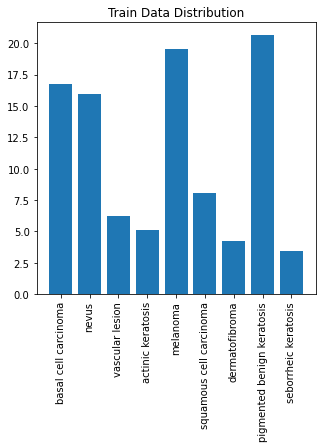

In [6]:
plt.figure(figsize=(5,5))
plt.bar(data_detail_pd.index,data_detail_pd['Total Percentage(Train)'])
plt.xticks(rotation=90)
plt.title("Train Data Distribution")
plt.show()

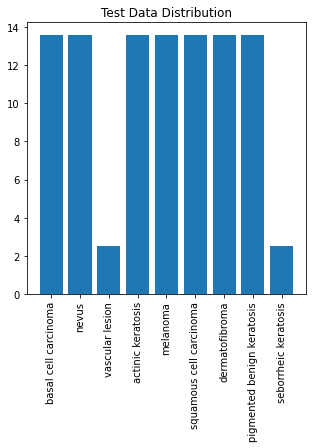

In [7]:
plt.figure(figsize=(5,5))
plt.bar(data_detail_pd.index,data_detail_pd['Total Percentage(Test)'])
plt.xticks(rotation=90)
plt.title("Test Data Distribution")
plt.show()

Class imbalanced, distribution of data different in train and test

## Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bicubic',
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bicubic',
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


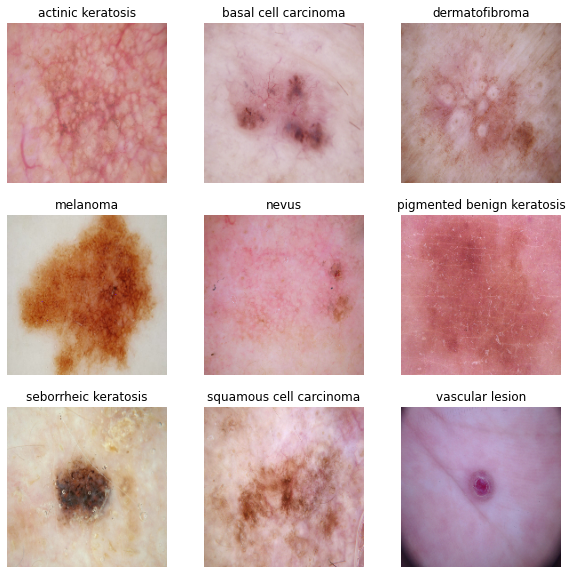

In [12]:
import matplotlib.pyplot as plt
import copy
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))

# get image each class
class_names_draw = [[] for i in range(len(class_names))]
count = 0
while count < len(class_names):
    for images, labels in train_ds.take(10):
        for i in range(batch_size):
            class_index = class_names.index(class_names[labels[i]])
            if class_names_draw[class_index] == []:
                class_names_draw[class_index] = images[i].numpy().astype("uint8")
                count +=1
    

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(class_names_draw[i])
    plt.title(class_names[i])
    plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model

In [14]:
input_shape = (180, 180, 3)
num_classes = 9

### Model 1: Only conv2d

In [22]:
## Your code goes here
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import Model

model1 = Sequential([
         layers.Rescaling(1./255,input_shape=input_shape),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
         ],
         name = 'Model_01')

#### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [23]:
### Todo, choose an appropirate optimiser and loss function
model1.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# View the summary of all layers
model1.summary()

Model: "Model_01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        184

#### Train the model

In [25]:
epochs = 20
history = model1.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 2s 26ms/step - loss: 2.0326 - accuracy: 0.2539 - val_loss: 1.8636 - val_accuracy: 0.3378
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.7371 - accuracy: 0.3638 - val_loss: 1.6989 - val_accuracy: 0.3289
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.5001 - accuracy: 0.4727 - val_loss: 1.4181 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3372 - accuracy: 0.5234 - val_loss: 1.3650 - val_accuracy: 0.5593
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2894 - accuracy: 0.5363 - val_loss: 1.4766 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.1954 - accuracy: 0.5725 - val_loss: 1.4432 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.0963 - accuracy: 0.6071 - val_loss: 1.4937 - val_accuracy: 0.5324
Epoch 8/20
56

#### Visualizing training results

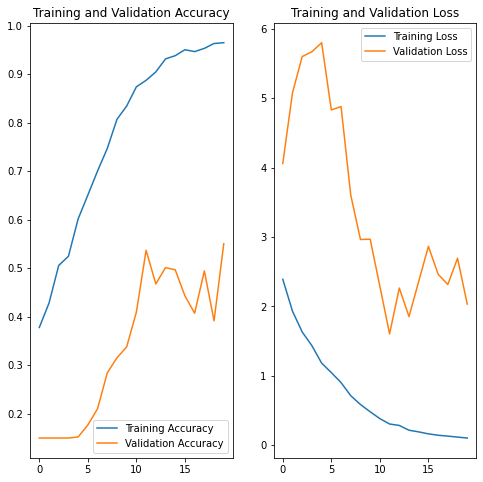

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings
1.   Training Accuracy   : Training Accuracy is high 
2.   Validation Accuracy : Validation accuracy is low compared to the Training Accuracy so , its not a good model.
3.   Training Loss       : Its decerasing
4.   Validation Loss     : Its decerasing until epoch 10 then increasing per epoch so not a good fit

### Model 2: With custom augmentation

In [45]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=input_shape),
    layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
    ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


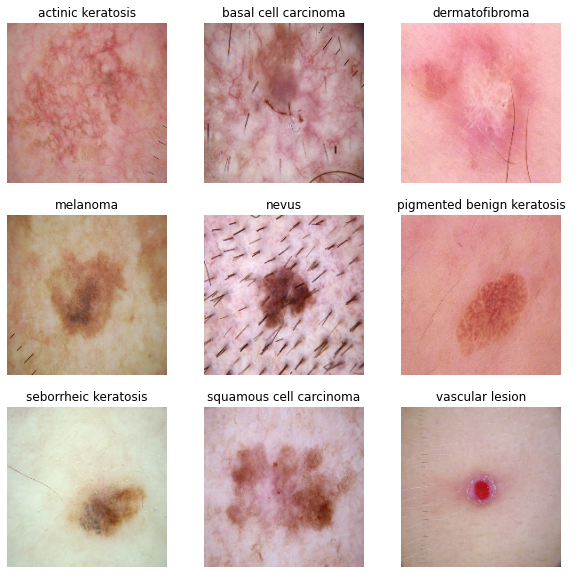

In [46]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))

# get image each class
class_names_draw = [[] for i in range(len(class_names))]
count = 0
while count < len(class_names):
    for images, labels in train_ds.take(10):
        # augmentation images
        images = data_augument(images)
        for i in range(batch_size):
            class_index = class_names.index(class_names[labels[i]])
            if class_names_draw[class_index] == []:
                class_names_draw[class_index] = images[i].numpy().astype("uint8")
                count +=1
    

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(class_names_draw[i])
    plt.title(class_names[i])
    plt.axis("off")
plt.show()
# _ = plt.title(get_label_name(label))

In [47]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model2 = Sequential([
    data_augument,
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.Conv2D(32,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.Conv2D(64,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.Dropout(0.2), # droupout layer
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)
    ],
    name="Model_02")
model2.summary()

Model: "Model_02"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                     

#### Compiling the model

In [48]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training the model

In [49]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model2.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
56/56 [==============================] - 4s 50ms/step - loss: 2.0665 - accuracy: 0.2310 - val_loss: 1.8852 - val_accuracy: 0.3289
Epoch 2/30
56/56 [==============================] - 3s 47ms/step - loss: 1.7251 - accuracy: 0.3783 - val_loss: 1.5600 - val_accuracy: 0.4698
Epoch 3/30
56/56 [==============================] - 3s 47ms/step - loss: 1.5766 - accuracy: 0.4442 - val_loss: 1.4911 - val_accuracy: 0.4944
Epoch 4/30
56/56 [==============================] - 3s 45ms/step - loss: 1.4726 - accuracy: 0.4905 - val_loss: 1.5596 - val_accuracy: 0.4810
Epoch 5/30
56/56 [==============================] - 3s 46ms/step - loss: 1.4507 - accuracy: 0.4894 - val_loss: 1.4387 - val_accuracy: 0.5056
Epoch 6/30
56/56 [==============================] - 3s 46ms/step - loss: 1.4026 - accuracy: 0.5067 - val_loss: 1.4780 - val_accuracy: 0.4989
Epoch 7/30
56/56 [==============================] - 3s 46ms/step - loss: 1.3557 - accuracy: 0.5285 - val_loss: 1.4625 - val_accuracy: 0.4966
Epoch 8/30
56

#### Visualizing the results

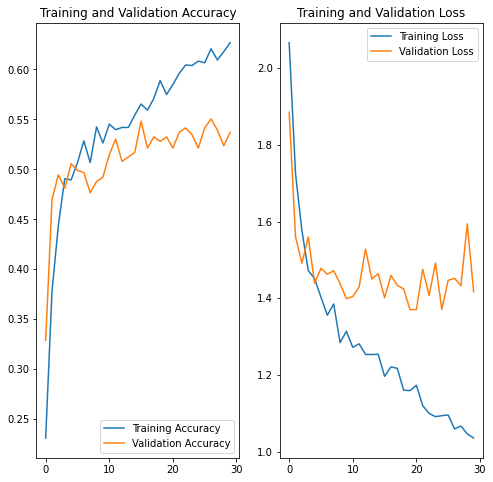

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings:
1. The training accuracy go down (underfit), but the distance between train and validation go down to
2. Try to add more layers
3. The analysis before have show that class is imbalanced and ditribution of classes in train and test is different

### Model 3: Adding more layers

In [63]:
model3 = Sequential([
    data_augument,
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),

    layers.Conv2D(32,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.Dropout(0.25), # droupout layer

    layers.Conv2D(64,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.Dropout(0.25), # droupout layer

    layers.Conv2D(128,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.Dropout(0.25), # droupout layer

    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.25), # droupout layer
    
    layers.Dense(num_classes)],
    name="Model_03"
    )
model3.summary()

Model: "Model_03"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                     

#### Compile model

In [60]:
model3.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training the model

In [61]:
epochs = 50
history = model3.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
56/56 [==============================] - 5s 60ms/step - loss: 2.1335 - accuracy: 0.1992 - val_loss: 2.0448 - val_accuracy: 0.3356
Epoch 2/50
56/56 [==============================] - 4s 64ms/step - loss: 1.8493 - accuracy: 0.3276 - val_loss: 1.7516 - val_accuracy: 0.3803
Epoch 3/50
56/56 [==============================] - 3s 48ms/step - loss: 1.9122 - accuracy: 0.3008 - val_loss: 1.8139 - val_accuracy: 0.3311
Epoch 4/50
56/56 [==============================] - 3s 48ms/step - loss: 1.7962 - accuracy: 0.3231 - val_loss: 1.6743 - val_accuracy: 0.4116
Epoch 5/50
56/56 [==============================] - 3s 50ms/step - loss: 1.7059 - accuracy: 0.3912 - val_loss: 1.6265 - val_accuracy: 0.4362
Epoch 6/50
56/56 [==============================] - 4s 63ms/step - loss: 1.6352 - accuracy: 0.4096 - val_loss: 1.5766 - val_accuracy: 0.4609
Epoch 7/50
56/56 [==============================] - 3s 48ms/step - loss: 1.6544 - accuracy: 0.4023 - val_loss: 1.5281 - val_accuracy: 0.4698
Epoch 8/50
56

#### Visualizing the results

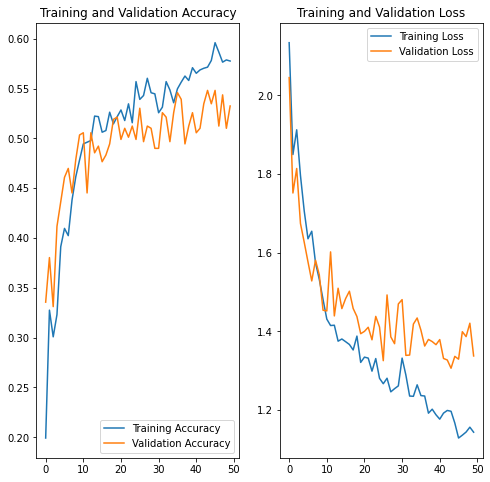

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings
Model has no Overfitting : as both train & validation accuracy move close to overlap (to epoch 30)

### Model 4: Adding BatchNorm

In [64]:
model4 = Sequential([
    data_augument,
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.25), # droupout layer

    layers.Conv2D(32,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.25), # droupout layer

    layers.Conv2D(64,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.25), # droupout layer

    layers.Conv2D(128,3,padding='same',activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.25), # droupout layer

    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    
    layers.Dense(num_classes)],
    name = "Model_04")

#### Compile model

In [65]:
model4.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training model

In [66]:
## Your code goes here, note: train your model for 20 epochs
epochs = 70
history = model4.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/70
56/56 [==============================] - 5s 62ms/step - loss: 2.3462 - accuracy: 0.3622 - val_loss: 3.0560 - val_accuracy: 0.1499
Epoch 2/70
56/56 [==============================] - 3s 52ms/step - loss: 1.5816 - accuracy: 0.4414 - val_loss: 4.1311 - val_accuracy: 0.2058
Epoch 3/70
56/56 [==============================] - 3s 52ms/step - loss: 1.4647 - accuracy: 0.4844 - val_loss: 6.3385 - val_accuracy: 0.2170
Epoch 4/70
56/56 [==============================] - 3s 51ms/step - loss: 1.3579 - accuracy: 0.5262 - val_loss: 9.2081 - val_accuracy: 0.2058
Epoch 5/70
56/56 [==============================] - 3s 57ms/step - loss: 1.3483 - accuracy: 0.5218 - val_loss: 10.5768 - val_accuracy: 0.2058
Epoch 6/70
56/56 [==============================] - 3s 51ms/step - loss: 1.3441 - accuracy: 0.5368 - val_loss: 13.5149 - val_accuracy: 0.2058
Epoch 7/70
56/56 [==============================] - 3s 50ms/step - loss: 1.2559 - accuracy: 0.5485 - val_loss: 10.6914 - val_accuracy: 0.2058
Epoch 8/70

#### Visualizing the results

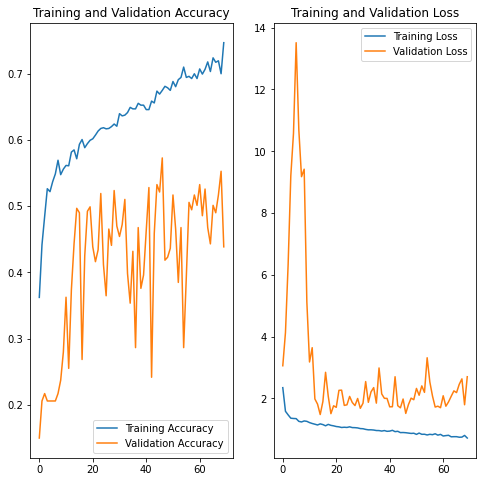

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings
1. No Additional improvement, its due to very less number of data
2. Try improve number of data

### Model 5: BatchNorm with more image by Augmentor

In [68]:
# install Augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
path_to_training_dataset= data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) ## We are adding 1000 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB4A04611D0>: 100%|██████████| 1000/1000 [00:37<00:00, 26.94 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB3EE5F4FD0>: 100%|██████████| 1000/1000 [00:38<00:00, 26.30 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB4181765D0>: 100%|██████████| 1000/1000 [00:38<00:00, 25.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB4A073E910>: 100%|██████████| 1000/1000 [03:11<00:00,  5.23 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FB4AE679790>: 100%|██████████| 1000/1000 [02:36<00:00,  6.38 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB4A0457D50>: 100%|██████████| 1000/1000 [00:39<00:00, 25.61 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FB4AFEA9190>: 100%|██████████| 1000/1000 [01:22<00:00, 12.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB3B5120E10>: 100%|██████████| 1000/1000 [00:36<00:00, 27.36 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/LJMU/DeepLearning/Master_LJMU-IIITB_Course05_01/data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB3B520ECD0>: 100%|██████████| 1000/1000 [00:38<00:00, 25.89 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [70]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


#### Lets see the distribution of augmented data after adding new images to the original training data.

In [85]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg'))) + len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

11239


In [86]:
data_detail_pd = pd.DataFrame(columns=["Dir_Name","Total Image(Train)","Total Percentage(Train)","Total Image(Test)","Total Percentage(Test)"])
# train data in each folders
for dir_name in glob.glob(os.path.join(data_dir_train, "*")):
  total_image_in_folder = len(glob.glob(os.path.join(dir_name, "*.jpg"))) + len(glob.glob(os.path.join(dir_name, "output", "*")))
  df = {"Dir_Name":os.path.basename(dir_name),"Total Image(Train)":total_image_in_folder,"Total Percentage(Train)":round((total_image_in_folder/image_count_train)*100,2)}
  data_detail_pd = data_detail_pd.append(df,ignore_index=True)
data_detail_pd = data_detail_pd.set_index("Dir_Name")
# test data in each folders
for dir_name in glob.glob(os.path.join(data_dir_test, "*")):
  total_image_in_folder = len(glob.glob(os.path.join(dir_name, "*.jpg")))
  data_detail_pd.loc[os.path.basename(dir_name),"Total Image(Test)"]  = total_image_in_folder
  data_detail_pd.loc[os.path.basename(dir_name),"Total Percentage(Test)"]  = round((total_image_in_folder/image_count_test)*100,2)
# data_detail_pd = data_detail_pd.set_index("Dir_Name")
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
pigmented benign keratosis,1462,13.01,16.0,13.56
melanoma,1438,12.79,16.0,13.56
basal cell carcinoma,1376,12.24,16.0,13.56
nevus,1357,12.07,16.0,13.56
squamous cell carcinoma,1181,10.51,16.0,13.56
vascular lesion,1139,10.13,3.0,2.54
actinic keratosis,1114,9.91,16.0,13.56
dermatofibroma,1095,9.74,16.0,13.56
seborrheic keratosis,1077,9.58,3.0,2.54


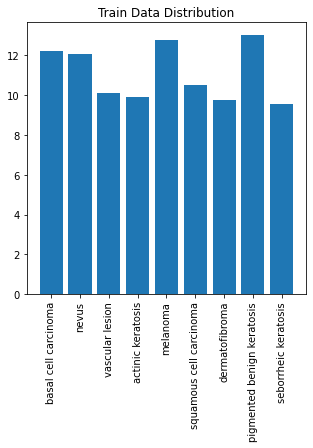

In [87]:
plt.figure(figsize=(5,5))
plt.bar(data_detail_pd.index,data_detail_pd['Total Percentage(Train)'])
plt.xticks(rotation=90)
plt.title("Train Data Distribution")
plt.show()

So, now we have added 1000 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [88]:
batch_size = 32
img_height = 180
img_width = 180

#### Create dataset

In [89]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bicubic',
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [90]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bicubic',
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### Create final model

In [91]:
model5 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.BatchNormalization(),
    #layers.Dropout(0.25),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.BatchNormalization(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.2),

    layers.Flatten(),

    layers.Dropout(0.2),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(num_classes)
    ],
    name="Model_05")
model5.summary()

Model: "Model_05"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 90, 90, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_40 (Conv2D)          (None, 90, 90, 64)        184

#### Compile model

In [93]:
model5.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

#### Train model

In [95]:
epochs = 50
history = model5.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
281/281 [==============================] - 63s 221ms/step - loss: 0.7775 - accuracy: 0.7194 - val_loss: 2.4363 - val_accuracy: 0.3618
Epoch 2/50
281/281 [==============================] - 62s 216ms/step - loss: 0.7265 - accuracy: 0.7382 - val_loss: 1.7106 - val_accuracy: 0.4749
Epoch 3/50
281/281 [==============================] - 64s 223ms/step - loss: 0.5822 - accuracy: 0.7899 - val_loss: 1.2557 - val_accuracy: 0.5923
Epoch 4/50
281/281 [==============================] - 61s 214ms/step - loss: 0.5326 - accuracy: 0.8103 - val_loss: 1.3072 - val_accuracy: 0.5763
Epoch 5/50
281/281 [==============================] - 64s 225ms/step - loss: 0.5185 - accuracy: 0.8155 - val_loss: 0.6914 - val_accuracy: 0.7575
Epoch 6/50
281/281 [==============================] - 61s 214ms/step - loss: 0.4332 - accuracy: 0.8471 - val_loss: 1.1250 - val_accuracy: 0.6613
Epoch 7/50
281/281 [==============================] - 64s 224ms/step - loss: 0.3915 - accuracy: 0.8570 - val_loss: 0.6380 - val_ac

#### Visualize the model results

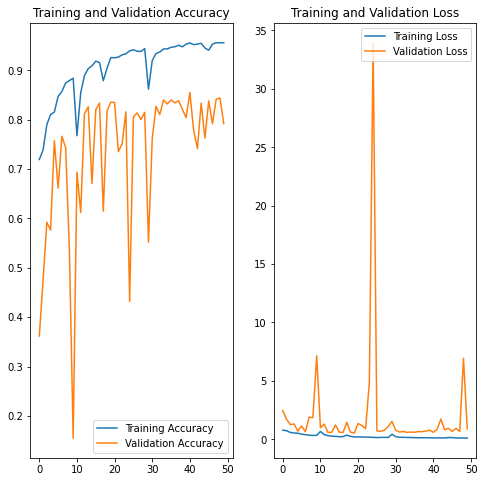

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings
Model get better with 94% acc on train and 84% on validation

### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [104]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    interpolation='bicubic',
)

Found 118 files belonging to 9 classes.


In [105]:
loss , accuracy = model5.evaluate(test_ds)

4/4 [==============================] - 4s 30ms/step - loss: 4.8403 - accuracy: 0.3305


In [106]:
print("Accuracy on test data ", accuracy)

Accuracy on test data  0.3305084705352783


### Conclusion
1. Accuracy on training data has increased by using Augmentor library

2. Model is still overfitting

3. The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

4. The Model can be further improved by tuning the hyperparameter